# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

In [64]:
#maching learing 部分重复一下，搜素部分作业已经用到了
from sklearn.datasets import load_boston
import random

In [65]:
dataset = load_boston()
x,y=dataset['data'],dataset['target']

In [66]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [67]:
X_rm = x[:,5] #第五个特征

In [69]:
# plot the RM with respect to y
plt.scatter(X_rm,y)

In [70]:
#define target function
def price(rm, k, b):
    return k * rm + b

In [71]:
# define loss function 
def loss_L2(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [72]:
def loss_L1(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [73]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient

In [74]:
#initialized parameters,L2 loss

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss_L2(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 2469.7901609710825, parameters k is 5.046501866058463 and b is -58.35664850206257
Iteration 1, the loss is 2089.3905197305016, parameters k is 5.668579893490648 and b is -58.25830043073675
Iteration 2, the loss is 1768.7868579653928, parameters k is 6.239668797251313 and b is -58.16796812147922
Iteration 3, the loss is 1498.579687374846, parameters k is 6.763947370843348 and b is -58.08499464676582
Iteration 4, the loss is 1270.847050105907, parameters k is 7.245251936411389 and b is -58.00877691730615
Iteration 5, the loss is 1078.9122618312088, parameters k is 7.68710441184567 and b is -57.93876126975251
Iteration 6, the loss is 917.1481639070363, parameters k is 8.092738077657554 and b is -57.874439416016486
Iteration 7, the loss is 780.8121456528662, parameters k is 8.465121232141025 and b is -57.81534472455759
Iteration 8, the loss is 665.9070999154834, parameters k is 8.80697890788485 and b is -57.761048806437486
Iteration 9, the loss is 569.0642353960611

In [77]:
#initialized parameters,L2 loss

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss_L1(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 494.23535892993135, parameters k is 97.35090284253076 and b is -95.04666638986859
Iteration 1, the loss is 453.6591178414656, parameters k is 91.05176626104895 and b is -96.03513710772846
Iteration 2, the loss is 416.4082881573616, parameters k is 85.26885046859414 and b is -96.9424553434114
Iteration 3, the loss is 382.21033710954293, parameters k is 79.95984879641198 and b is -97.77527191972612
Iteration 4, the loss is 350.81506724446496, parameters k is 75.08592180194663 and b is -98.5396925939452
Iteration 5, the loss is 321.9927859413017, parameters k is 70.61141311369767 and b is -99.24132272843413
Iteration 6, the loss is 295.5326249465446, parameters k is 66.50358856389873 and b is -99.88530830031674
Iteration 7, the loss is 271.24099763046917, parameters k is 62.73239670047359 and b is -100.47637355020983
Iteration 8, the loss is 248.9401826785351, parameters k is 59.27024892613958 and b is -101.01885554547077
Iteration 9, the loss is 228.4670238557994

该梯度下降只有一个x，若x个数为2以上则需要使用导数矩阵运算，对损失函数L1，L2敏感，L1下降快而不容易收敛，L2下降相对较慢收敛效果更好，k，b的初始值很大程度影响了梯度下降有效性，若初始值比较特别，则会出现搜索不到正确方向的情况

梯度下降为一阶搜索方法，较牛顿法收敛慢，但适用性更强，是最常用的优化方法

In [75]:
plt.plot(list(range(iteration_num)),losses)

In [76]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

1.All costs between two nodes are positive or zero

2.Sort the list used to maintain the searching history in every iteration

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

In [ ]:
"Maybe iterative deepening search is a better solution."

"IDDFS:"

def IDDFS(root, max_depth):
    for depth in range(0, max_depth):
        found = dLS(root, depth)
        if found != None:
            return found

def DLS(node, depth):
    if depth == 0 or node is target:
        return node
    elif depth > 0:
        for child in node:
            found = DLS(child, depth-1)
            if found != None:
                return found
    return null  

its time cost is O(b^d),space cost is O(d)

我们经常使用BFS 这样做的好处是：第一次搜索到目标点时，就是到达目标点的最小步数。因为我们每次都存下了当前步能达到的所有点。而BFS所使用的空间开支较大，我们每一步都存下了当前步所能达到的所有点的坐标。而DFS的话，我们的空间开支较小，走了多少步就需要多少空间，但是因为没有一个明确的结束标准，所以我们不知道DFS要到什么时候停下来，所以也有可能会产生较大的时间开支。

这个时候，我们就学习到了一种新的搜索方法：迭代加深搜索。IDDFS的特点是：用BFS的思想去跑DFS。

我们知道DFS的搜索我们都有一个深度，那么我们限制每次搜索的深度，就像是用DFS每次去跑出BFS的某一层。

这个时候的好处是：我们的空间开销减少了，但是由于我们没加深一层，都相当于对其N-1层又跑了一遍DFS，而这个虽然是重复计算越多的内容越少（深度较小时节点数目较少）但累加起来也是不小的开销。所以相当于我们用时间去换取了部分空间。

所以IDDFS一般用于：空间限制较强，或BFS需要较大空间，而时间相对宽松的情况.


摘抄自CSDN博主，伪代码写得不是很有信心

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

DFS：

strength:
1.space cost is less than BFS
2.find all the solutions

weakness:
1.In most case can not find the best solution
2.when the depth is a enormous number,the approach is in poor efficiency.

BFS:

strength:
1.Find the best solution(the shortest)

weakness:
1.Space cost is large.

##### 2.4 When can we use machine learning ?

Sometimes it is very difficult to find a complicated formula to matching data when they are in high dimensions or in strange distributions, but using machine learning we can fit the data more easily and get the model that behaves well in data set.

##### 2.5 What is the gradient of a function ?

The gradient is a vector indicating that the directional derivative of a function at that point obtains the maximun value along that direction, which means that the function changes the fastest along that direction at that point.

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

Ascend means that we renew the paramaters of function by using formula(α' = α + ▽f(α)) and we check the new function value by adding new paramaters,then we repeat that process until the maximun value is found or such approach can't not find a better result.

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [1]:
import requests
from bs4 import BeautifulSoup
import requests
import re

In [2]:
def getString(pattern,string):
    return re.findall(pattern,string)

In [3]:
#爬取北京地铁线路的url
import requests
allUrl = "http://bj.bendibao.com/ditie/linemap.shtml"
response = requests.get(allUrl)
notProcessText = response.text
response

<Response [200]>

In [4]:
response.text

'\r\n\r\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=gb2312" />\r\n<title>北京地铁线路图，2020最新北京地铁线路图，北京地铁地图-北京本地宝</title>\r\n<meta content="北京地铁线路图,2020北京地铁最新线路图,北京地铁地图" name="Keywords" />\r\n<meta content="北京本地宝交通频道为你带来北京地铁线路图，2020北京地铁最新线路图的详细信息" name="Description" />\r\n<meta name="renderer" content="webkit">\r\n\r\n<link rel="stylesheet" href="http://jtapi.bendibao.com/ditie/css/cssreset.min.css" />\r\n<link rel="stylesheet" href="http://jtapi.bendibao.com/ditie/css/metro.min.css" />\r\n<link rel="stylesheet" href="http://jtapi.bendibao.com/ditie/css/linecolor.min.css" />\r\n<link rel="stylesheet" href="http://jtapi.bendibao.com/ditie/css/timetable.min.css" />\r\n<link rel="stylesheet" href="http://jtapi.bendibao.com/ditie/css/top.css" />\r\n\r\n\r\n<meta http-equiv="mobile-agent" content="for

In [5]:
subwayLineExample = "http://bj.bendibao.com/ditie/map_197.shtml"
allSubwayLinePattern = re.compile(r'(/ditie/map_\d+.shtml)')

In [6]:
suffixUrl = [set(getString(allSubwayLinePattern,notProcessText))]
allSubwayLineUrl = ['http://bj.bendibao.com' + url for url in suffixUrl[0]]

In [7]:
allSubwayLineUrl

['http://bj.bendibao.com/ditie/map_212.shtml',
 'http://bj.bendibao.com/ditie/map_207.shtml',
 'http://bj.bendibao.com/ditie/map_208.shtml',
 'http://bj.bendibao.com/ditie/map_253.shtml',
 'http://bj.bendibao.com/ditie/map_211.shtml',
 'http://bj.bendibao.com/ditie/map_201.shtml',
 'http://bj.bendibao.com/ditie/map_254.shtml',
 'http://bj.bendibao.com/ditie/map_198.shtml',
 'http://bj.bendibao.com/ditie/map_197.shtml',
 'http://bj.bendibao.com/ditie/map_199.shtml',
 'http://bj.bendibao.com/ditie/map_210.shtml',
 'http://bj.bendibao.com/ditie/map_200.shtml',
 'http://bj.bendibao.com/ditie/map_204.shtml',
 'http://bj.bendibao.com/ditie/map_203.shtml',
 'http://bj.bendibao.com/ditie/map_206.shtml',
 'http://bj.bendibao.com/ditie/map_202.shtml',
 'http://bj.bendibao.com/ditie/map_346.shtml',
 'http://bj.bendibao.com/ditie/map_205.shtml',
 'http://bj.bendibao.com/ditie/map_209.shtml']

In [8]:
# 不可换乘的正则表达式
# <a href="/ditie/zd_liujiayao.shtml" class="link" target="_blank">刘家窑</a>
stationUntransferablePattern = re.compile(r'\w+"\s+target="_blank">((?!地铁|北京地铁)\w+)</a>')
# 可换乘的正则表达式
# <a class="link" href="/ditie/zd_songjiazhuang.shtml">宋家庄</a>
stationTransferablePattern = re.compile(r'<a\s+class="link"\s+href="/ditie/\w+_\w+.shtml">((?!地铁|北京地铁)\w+)</a>')

In [9]:
# <a\s+href="/ditie/\w+_\w+.shtml"\s+\w+="\w+"\s+target="_blank">(\w+)</a>
# <a href="/ditie/zd_puhuangyu.shtml" class="link" target="_blank">蒲黄榆</a>

In [10]:
def getStation(input,station_TransferablePattern,station_UntransferablePattern):
    target = []
    for line in input:
        station = getString(station_TransferablePattern,str(line))
#         print(station)
        #如果是不能换乘的，就抽不到数据，因此做个判断
        if len(station) == 0:
            station = getString(station_UntransferablePattern,str(line))
            
        if len(station) != 0:
            target.append(station[0])

    return target

In [11]:
#测试
# a = requests.get(allSubwayLineUrl[0])
# soup_a = BeautifulSoup(a.text)
# soup_a_all = soup_a.find_all('a')
# for line in soup_a_all:
#     a = getString(stationUntransferablePattern,str(line))
#     print(a)
    

In [12]:
allSubwayStation = {}
for url in allSubwayLineUrl:
    response = requests.get(url)
    #解析，并输出utf—8文本
    soup = BeautifulSoup(response.text)
    subwayLineName = str(soup.title).split(',')[0].lstrip('<title>')[4:-3]
    #思路是先把所有含”a“元素的html片段抽取出来，再用写好的正则过滤
    soupGetA = soup.find_all('a')
    stations = getStation(soupGetA,stationTransferablePattern,stationUntransferablePattern)
    allSubwayStation[subwayLineName] = stations

In [13]:
allSubwayStation

{'10号线': ['巴沟',
  '苏州街',
  '海淀黄庄',
  '知春里',
  '知春路',
  '西土城',
  '牡丹园',
  '健德门',
  '北土城',
  '安贞门',
  '惠新西街南口',
  '芍药居',
  '太阳宫',
  '三元桥',
  '亮马桥',
  '农业展览馆',
  '团结湖',
  '呼家楼',
  '金台夕照',
  '国贸',
  '双井',
  '劲松',
  '潘家园',
  '十里河',
  '分钟寺',
  '成寿寺',
  '宋家庄',
  '石榴庄',
  '大红门',
  '角门东',
  '角门西',
  '草桥',
  '纪家庙',
  '首经贸',
  '丰台站',
  '泥洼',
  '西局',
  '六里桥',
  '莲花桥',
  '公主坟',
  '西钓鱼台',
  '慈寿寺',
  '车道沟',
  '长春桥',
  '火器营'],
 '亦庄线': ['宋家庄',
  '肖村',
  '小红门',
  '旧宫',
  '亦庄桥',
  '亦庄文化园',
  '万源街',
  '荣京东街',
  '荣昌东街',
  '同济南路',
  '经海路',
  '次渠南',
  '次渠'],
 '机场线(L1)': ['东直门', '三元桥', 'T3航站楼', 'T2航站楼'],
 '7号线': ['北京西站',
  '湾子',
  '达官营',
  '广安门内',
  '菜市口',
  '虎坊桥',
  '珠市口',
  '桥湾',
  '磁器口',
  '广渠门内',
  '广渠门外',
  '双井',
  '九龙山',
  '大郊亭',
  '百子湾',
  '化工',
  '南楼梓庄',
  '欢乐谷景区',
  '垡头',
  '双合',
  '焦化厂'],
 '2号线(内环)': ['积水潭',
  '鼓楼大街',
  '安定门',
  '雍和宫',
  '东直门',
  '东四十条',
  '朝阳门',
  '建国门',
  '北京站',
  '崇文门',
  '前门',
  '和平门',
  '宣武门',
  '长椿街',
  '复兴门',
  '阜成门',
  '车公庄',
  '西直门'],
 '9号线(M9)': ['郭公庄',
  '丰台科技园',
  '科怡路',

In [14]:
len(allSubwayStation)

19

# 从高德地图api中爬取各个地铁站点坐标并进行数据清洗

In [15]:
url = 'http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json'
response = requests.get(url)
preProcessText = response.text

In [16]:
preProcessText

'{"s":"北京市地铁","i":"1100","l":[{"st":[{"rs":"270 684|270 684","udpx":"270 687;270 681","su":"1","udsu":"1;1","n":"金安桥","sid":"110100023339035","p":"270 684","r":"900000069871|110100023339","udsi":"900000069872015;900000069871002","t":"1","si":"110100023339035","sl":"116.163167,39.923620","udli":"900000069872;900000069871","poiid":"BV10813545","lg":"0","sp":"jin an qiao"},{"rs":"226 684","udpx":"226 681;226 687","su":"1","udsu":"1;1","n":"四道桥","sid":"900000069871003","p":"226 684","r":"900000069871","udsi":"900000069871003;900000069872014","t":"0","si":"900000069871003","sl":"116.134010,39.916030","udli":"900000069871;900000069872","poiid":"BV10813547","lg":"0","sp":"si dao qiao"},{"rs":"181 684","udpx":"180 681;180 687","su":"1","udsu":"1;1","n":"桥户营","sid":"900000069871004","p":"181 684","r":"900000069871","udsi":"900000069871004;900000069872013","t":"0","si":"900000069871004","sl":"116.125809,39.912383","udli":"900000069871;900000069872","poiid":"BV10813541","lg":"0","sp":"qiao hu yin

In [17]:
# "n":"金安桥","sid":"110100023339035","p":"270 684","r":"900000069871|110100023339","udsi":"900000069872015;900000069871002","t":"1","si":"110100023339035","sl":"116.163167,39.923620"
#"n":"(\w+)","sid":"\d+","p":"\d+\s+\d+","r":"900000069871","udsi":"900000069871003;900000069872014","t":"0","si":"900000069871003","sl":"116.134010,39.916030"
#高德地图的格式有变化且比较隐蔽，坑,正则没学好，只能写两个了汗
stationLocation = {}
stationLocationPatternFirst = re.compile(r'"n":"(\w+)","sid":"\d+","p":"\d+\s+\d+","r":"\d+(?:\|\d+)","udsi":"\d+;\d+","t":"\d+","si":"\d+","sl":"(\d+.\d+),(\d+.\d+)"')
stationLocationPatternSecond = re.compile(r'"n":"(\w+)","sid":"\d+","p":"\d+\s+\d+","r":"\d+[\|\d+]?","udsi":"\d+;\d+","t":"\d+","si":"\d+","sl":"(\d+.\d+),(\d+.\d+)"')
stationLocationList = getString(stationLocationPatternFirst,preProcessText) + getString(stationLocationPatternSecond,preProcessText)

In [18]:
stationLocationList

[('金安桥', '116.163167', '39.923620'),
 ('公主坟', '116.309919', '39.907469'),
 ('军事博物馆', '116.321459', '39.907422'),
 ('复兴门', '116.356866', '39.907242'),
 ('西单', '116.374072', '39.907383'),
 ('东单', '116.418480', '39.908325'),
 ('建国门', '116.435806', '39.908501'),
 ('国贸', '116.461841', '39.909104'),
 ('大望路', '116.475783', '39.908287'),
 ('四惠', '116.495456', '39.908749'),
 ('四惠东', '116.515664', '39.908495'),
 ('鼓楼大街', '116.393776', '39.948972'),
 ('雍和宫', '116.417069', '39.949336'),
 ('朝阳门', '116.434584', '39.924499'),
 ('建国门', '116.435806', '39.908501'),
 ('崇文门', '116.417093', '39.901063'),
 ('宣武门', '116.374314', '39.899765'),
 ('复兴门', '116.356866', '39.907242'),
 ('车公庄', '116.354357', '39.932397'),
 ('角门西', '116.371154', '39.845850'),
 ('北京南站', '116.378963', '39.865029'),
 ('菜市口', '116.374425', '39.889296'),
 ('宣武门', '116.374314', '39.899765'),
 ('西单', '116.374072', '39.907383'),
 ('平安里', '116.372883', '39.933949'),
 ('国家图书馆', '116.325190', '39.943114'),
 ('海淀黄庄', '116.317564', '39.975996'),

In [19]:
#增设station坐标
for name,longitude,latitude in stationLocationList:
    if name not in stationLocation:
        stationLocation[name] = [float(longitude),float(latitude)]

In [20]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d


In [21]:
def get_station_distance(station1,station2):
    return geo_distance(stationLocation[station1],stationLocation[station2])

In [22]:
get_station_distance('双合','车公庄西')

20.638175569493985

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(3,figsize=(18,18))
%matplotlib inline

In [24]:
stationGraph = nx.Graph()

In [25]:
stationGraph.add_nodes_from(list(stationLocation.keys()))

In [26]:
stationGraph.nodes()

NodeView(('金安桥', '公主坟', '军事博物馆', '复兴门', '西单', '东单', '建国门', '国贸', '大望路', '四惠', '四惠东', '鼓楼大街', '雍和宫', '朝阳门', '崇文门', '宣武门', '车公庄', '角门西', '北京南站', '菜市口', '平安里', '国家图书馆', '海淀黄庄', '西苑', '蒲黄榆', '磁器口', '东四', '惠新西街南口', '大屯路东', '立水桥', '金台路', '呼家楼', '南锣鼓巷', '白石桥南', '慈寿寺', '花庄', '九龙山', '双井', '珠市口', '北京西站', '北土城', '奥林匹克公园', '霍营', '朱辛庄', '永定门外', '郭公庄', '七里庄', '六里桥', '知春路', '芍药居', '三元桥', '十里河', '草桥', '西局', '西二旗', '望京西', '望京', '阎村东', '巴沟', '四道桥', '桥户营', '上岸', '栗园庄', '小园', '石厂', '苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '木樨地', '南礼士路', '天安门西', '天安门东', '王府井', '永安里', '安定门', '东四十条', '北京站', '前门', '和平门', '长椿街', '阜成门', '天宫院', '生物医药基地', '义和庄', '黄村火车站', '黄村西大街', '清源路', '枣园', '高米店南', '高米店北', '西红门', '新宫', '公益西桥', '马家堡', '陶然亭', '灵境胡同', '西四', '新街口', '动物园', '魏公村', '人民大学', '中关村', '北京大学东门', '圆明园', '北宫门', '安河桥北', '刘家窑', '天坛东门', '灯市口', '张自忠路', '北新桥', '和平里北街', '和平西桥', '惠新西街北口', '北苑路北', '立水桥南', '天通苑南', '天通苑', '天通苑北', '潞城', '东夏园', '郝家府', '北运河东', '北运河西', '通州北关', '物资学院路', '草房', '常营', '黄渠', '褡裢坡', '青年路', '十里堡', '东大桥',

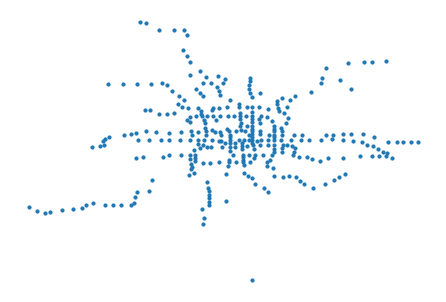

In [27]:
nx.draw(stationGraph,stationLocation,node_size = 10)

##### 2. Preprocessing data

# 将各号线相邻的地铁站点连接起来

In [28]:
from collections import defaultdict
stationsConnection = defaultdict(list)
stationsConnection

defaultdict(list, {})

In [29]:
for line in allSubwayStation.keys():
    for i,station in enumerate(allSubwayStation[line][:-1]):
        if station == allSubwayStation[line][i+1]: continue
        
        if allSubwayStation[line][i+1] not in stationsConnection[station]:
            stationsConnection[station].append(allSubwayStation[line][i+1])
        if station not in stationsConnection[allSubwayStation[line][i+1]]:
            stationsConnection[allSubwayStation[line][i+1]].append(station)

In [30]:
stationsGraphConnection = nx.Graph(stationsConnection)

In [31]:
stationsGraphConnection.edges

EdgeView([('巴沟', '苏州街'), ('苏州街', '海淀黄庄'), ('海淀黄庄', '知春里'), ('海淀黄庄', '中关村'), ('海淀黄庄', '人民大学'), ('知春里', '知春路'), ('知春路', '西土城'), ('知春路', '大钟寺'), ('知春路', '五道口'), ('西土城', '牡丹园'), ('牡丹园', '健德门'), ('健德门', '北土城'), ('北土城', '安贞门'), ('北土城', '奥体中心'), ('北土城', '安华桥'), ('安贞门', '惠新西街南口'), ('惠新西街南口', '芍药居'), ('惠新西街南口', '和平西桥'), ('惠新西街南口', '惠新西街北口'), ('芍药居', '太阳宫'), ('芍药居', '望京西'), ('芍药居', '光熙门'), ('太阳宫', '三元桥'), ('三元桥', '亮马桥'), ('三元桥', '东直门'), ('三元桥', 'T3航站楼'), ('亮马桥', '农业展览馆'), ('农业展览馆', '团结湖'), ('团结湖', '呼家楼'), ('呼家楼', '金台夕照'), ('呼家楼', '东大桥'), ('呼家楼', '金台路'), ('金台夕照', '国贸'), ('国贸', '双井'), ('国贸', '永安里'), ('国贸', '大望路'), ('双井', '劲松'), ('双井', '广渠门外'), ('双井', '九龙山'), ('劲松', '潘家园'), ('潘家园', '十里河'), ('十里河', '分钟寺'), ('十里河', '方庄'), ('十里河', '北工大西门'), ('分钟寺', '成寿寺'), ('成寿寺', '宋家庄'), ('宋家庄', '石榴庄'), ('宋家庄', '肖村'), ('宋家庄', '刘家窑'), ('石榴庄', '大红门'), ('大红门', '角门东'), ('角门东', '角门西'), ('角门西', '草桥'), ('角门西', '马家堡'), ('角门西', '公益西桥'), ('草桥', '纪家庙'), ('纪家庙', '首经贸'), ('首经贸', '丰台站'), ('丰台站', '泥洼'), ('泥洼', '西局'), ('西局', '六里桥'),

In [32]:
#高德有些站点爬不到
stationLocation['积水潭'] = (116.379185,39.954765)
stationLocation['车道沟'] = (116.30724,39.951215)
stationLocation['宋家庄'] = (116.42837,39.8457869613)
stationLocation['西直门'] = (116.3554137,39.94030355)
stationLocation['东直门'] = (116.4336633682,39.9411332638)
#中文乱码
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [33]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib 
matplotlib.matplotlib_fname()


Using matplotlib backend: MacOSX


'/Users/junjiexie/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

In [34]:
plt.figure(figsize = (100,100))

<Figure size 3584x14400 with 0 Axes>

In [41]:
nx.draw(stationsGraphConnection,stationLocation,with_labels = True,node_size = 10,font_size = 15)
#mac显示字体bug一直没修复好，弄了2h最后放弃了，就是最后效果略丑

/Users/junjiexie/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

#### 3. Build the search agent

# BFS First Edition

In [43]:
def search_1(graph,start,destination):
    pathes = [[start]]  # list 用来存储待搜索路径
    visited = set() # set用来存储已搜索的节点
    
    while pathes:
        path = pathes.pop(0)  #提取第一条路径
        froniter = path[-1]   #提取即将要探索的节点
        
        if froniter in visited: continue  #检查如果该点已经探索过 则不用再探索
            
        successsors = graph[froniter]
        
        for city in successsors:      #遍历子节点
            if city in path: continue  # check loop #检查会不会形成环
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs     #将新路径加到list里面
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:  #检查目的地是不是已经搜索到了
                return new_path
        visited.add(froniter)

In [44]:
search_1(stationsGraphConnection,"朱辛庄","六道口")

['朱辛庄',
 '育知路',
 '平西府',
 '回龙观东大街',
 '霍营',
 '立水桥',
 '北苑',
 '望京西',
 '关庄',
 '安立路',
 '奥林匹克公园',
 '北沙滩',
 '六道口']

# Optimal search using variation of BFS

In [46]:
def search_2(graph,start,destination,search_strategy):
    pathes = [[start]]
    visited = set()# ！
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited : continue# ！
            
        if froniter == destination:# ！
            return path# ！
        
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue  # check loop
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs
            
        pathes = search_strategy(pathes)
        visited.add(froniter) # ！
       # if pathes and (destination == pathes[0][-1]):
       #     return pathes[0] 

In [56]:
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_station_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)

In [61]:
def sort_by_less_station(pathes):
    '''换乘最少'''
    return sorted(pathes,key=lambda x:len(x))

In [57]:
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_station_distance(path[i],path[i+1])
    return distance

In [58]:
get_distance_of_path(["朱辛庄","六道口"])

6.69032947634215

In [59]:
search_2(stationsGraphConnection,"朱辛庄","六道口",search_strategy=lambda x:x)

['朱辛庄',
 '育知路',
 '平西府',
 '回龙观东大街',
 '霍营',
 '立水桥',
 '北苑',
 '望京西',
 '关庄',
 '安立路',
 '奥林匹克公园',
 '北沙滩',
 '六道口']

In [60]:
search_2(stationsGraphConnection,"朱辛庄","六道口",search_strategy=lambda x:sort_by_distance(x))

['朱辛庄',
 '育知路',
 '平西府',
 '回龙观东大街',
 '霍营',
 '育新',
 '西小口',
 '永泰庄',
 '林萃桥',
 '森林公园南门',
 '奥林匹克公园',
 '北沙滩',
 '六道口']

In [63]:
search_2(stationsGraphConnection,"朱辛庄","六道口",search_strategy=lambda x:sort_by_less_station(x))

['朱辛庄',
 '育知路',
 '平西府',
 '回龙观东大街',
 '霍营',
 '立水桥',
 '北苑',
 '望京西',
 '关庄',
 '安立路',
 '奥林匹克公园',
 '北沙滩',
 '六道口']

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 